In [2]:
import numpy as np

# Gaussian Distribution

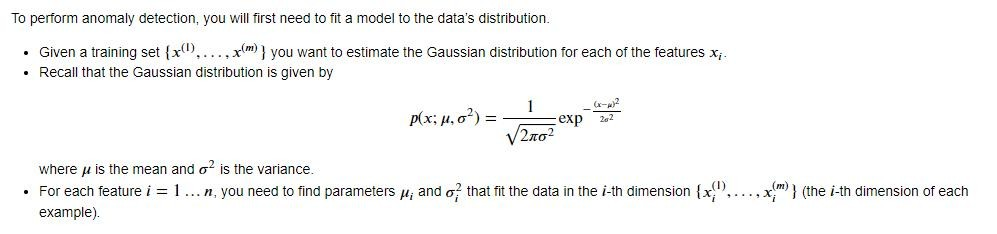

Estimate Gaussian


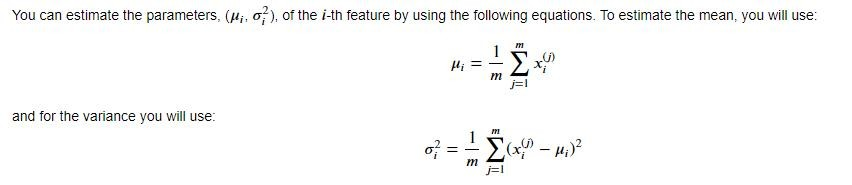

In [3]:
# GRADED FUNCTION: estimate_gaussian

def estimate_gaussian(X): 
    """
    Calculates mean and variance of all features 
    in the dataset
    
    Args:
        X (ndarray): (m, n) Data matrix
    
    Returns:
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features
    """

    m, n = X.shape
    s=0
    
    ### START CODE HERE ### 
    for i in range(m):
        s = s+X[i]
        
    mu = (1/m) * s
   
    var = 1 / m * np.sum((X - mu) ** 2, axis = 0)
    
    ### END CODE HERE ### 
        
    return mu, var

# Select Threshold
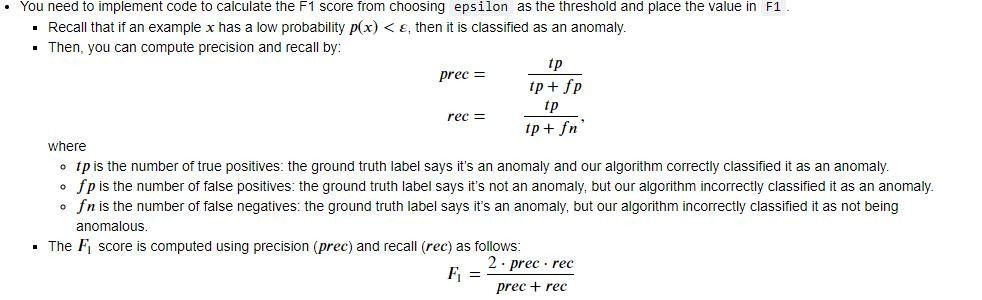

In [5]:
# GRADED FUNCTION: select_threshold

def select_threshold(y_val, p_val): 
    """
    Finds the best threshold to use for selecting outliers 
    based on the results from a validation set (p_val) 
    and the ground truth (y_val)
    
    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set
        
    Returns:
        epsilon (float): Threshold chosen 
        F1 (float):      F1 score by choosing epsilon as threshold
    """ 

    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    
    step_size = (max(p_val) - min(p_val)) / 1000
    
    for epsilon in np.arange(min(p_val), max(p_val), step_size):
    
        ### START CODE HERE ### 
        
        predictions = predictions = (p_val < epsilon)
        
        tp = np.sum((predictions == 1) & (y_val == 1))
        fn = np.sum((predictions == 0) & (y_val == 1))
        fp = sum((predictions == 1) & (y_val == 0))
        
        prec = tp/(tp+fp)
        
        rec = tp/(tp+fn**2)
        
        F1 = (2*prec*rec)/(prec+rec)
        
        ### END CODE HERE ### 
        
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
        
    return best_epsilon, best_F1